In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
import numpy as np
# Imports and settings for plotting of graphs
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
#import h2o
#from h2o.automl import H2OAutoML
#h2o.init()

# location feature

In [4]:
df = pd.read_csv("Dataset_crimes.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df.shape

(34225, 22)

In [5]:
df['Location Description'].unique()

array(['APARTMENT', 'RESIDENCE', 'CHA APARTMENT', 'RESIDENCE - GARAGE',
       'SMALL RETAIL STORE', 'STREET', 'BARBERSHOP', 'CAR WASH',
       'CONVENIENCE STORE', 'VEHICLE NON-COMMERCIAL',
       'RESIDENCE - YARD (FRONT / BACK)', 'GAS STATION',
       'ATM (AUTOMATIC TELLER MACHINE)', 'COMMERCIAL / BUSINESS OFFICE',
       'DEPARTMENT STORE', 'PARK PROPERTY', 'GROCERY FOOD STORE', nan,
       'CTA TRAIN', 'RESIDENCE - PORCH / HALLWAY',
       'PARKING LOT / GARAGE (NON RESIDENTIAL)', 'SIDEWALK',
       'HOTEL / MOTEL', 'RESTAURANT', 'TAVERN / LIQUOR STORE',
       'POLICE FACILITY / VEHICLE PARKING LOT', 'OTHER (SPECIFY)',
       'DRUG STORE', 'ALLEY', 'CONSTRUCTION SITE',
       'VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)',
       'CTA PLATFORM', 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA',
       'APPLIANCE STORE', 'KENNEL', 'CTA BUS STOP',
       'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'ATHLETIC CLUB',
       'DRIVEWAY - RESIDENTIAL', 'NURSING / RETIREME

<AxesSubplot:>

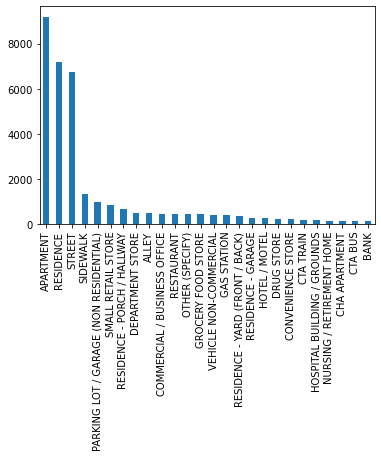

In [6]:
counter = df['Location Description'].value_counts()
counter = counter[counter > 100]
counter.plot(kind='bar')

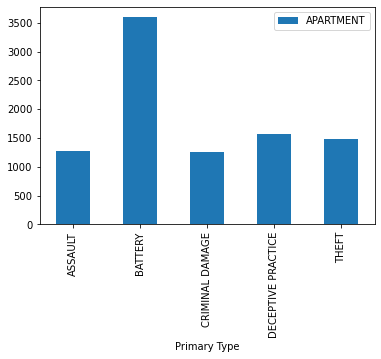

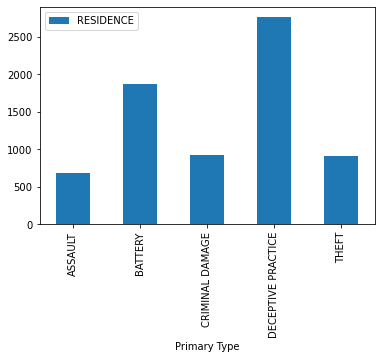

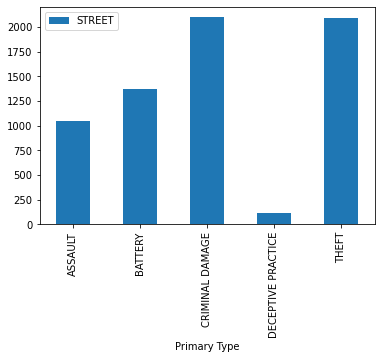

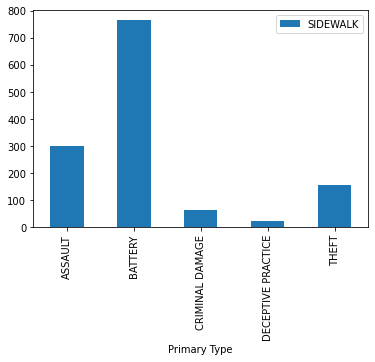

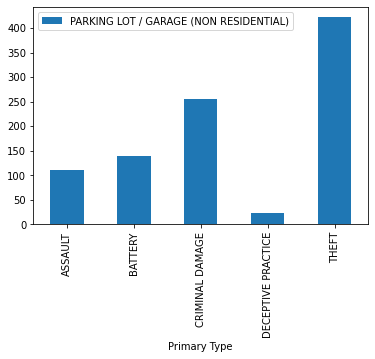

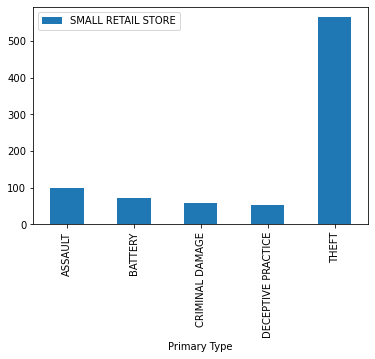

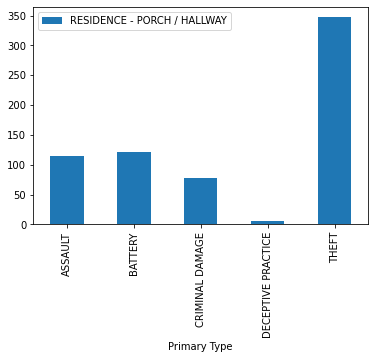

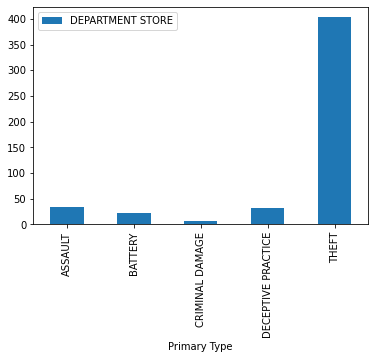

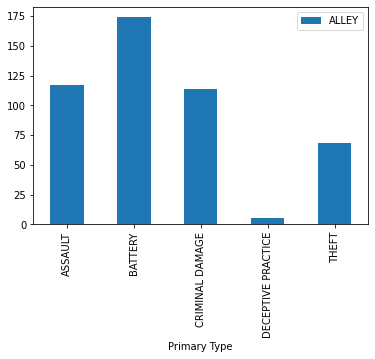

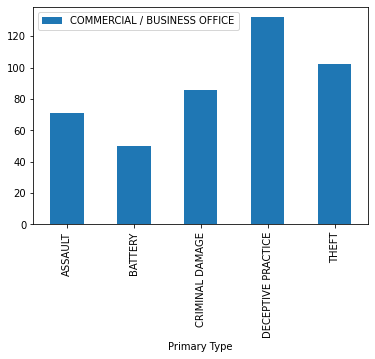

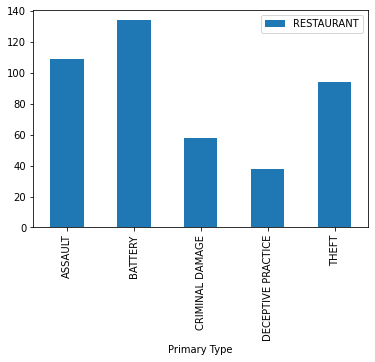

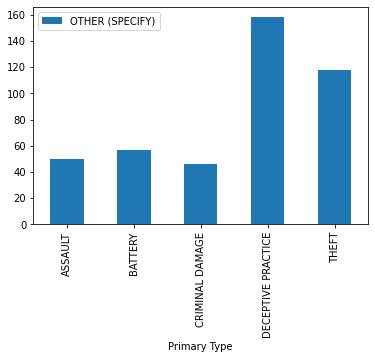

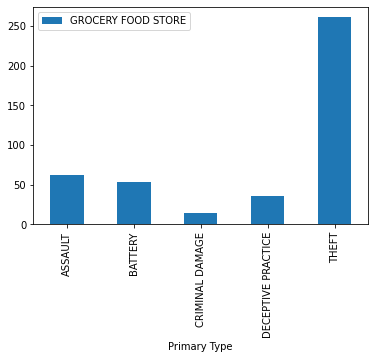

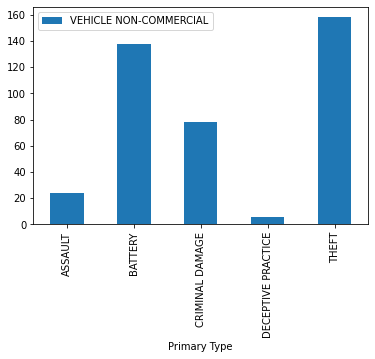

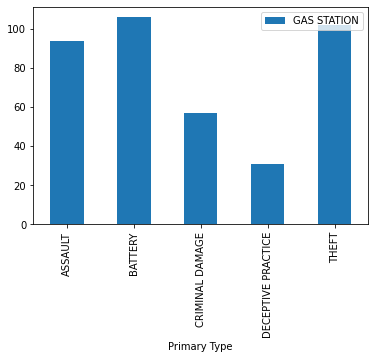

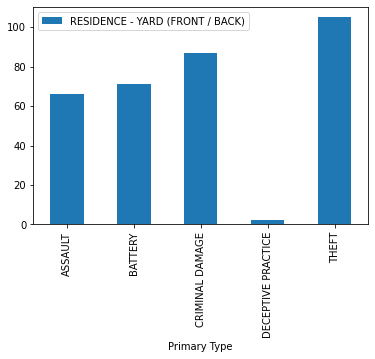

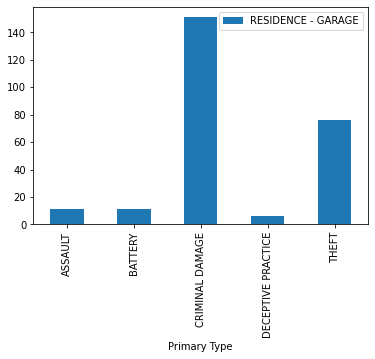

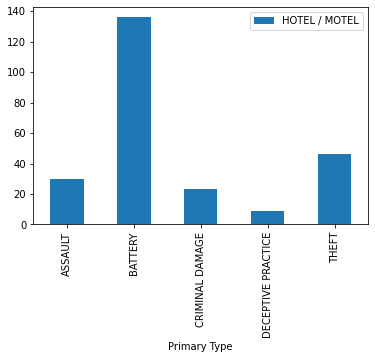

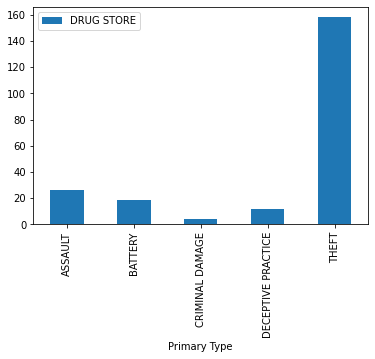

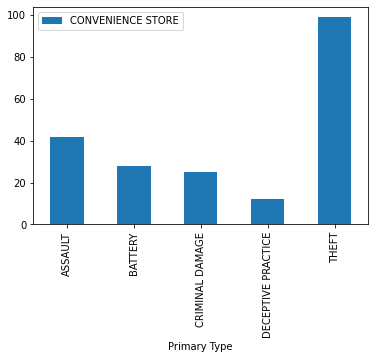

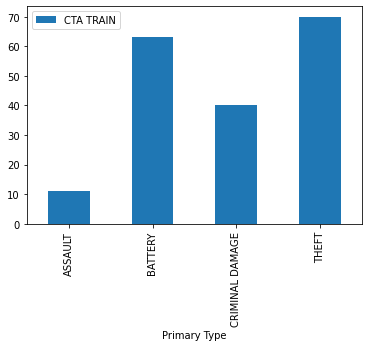

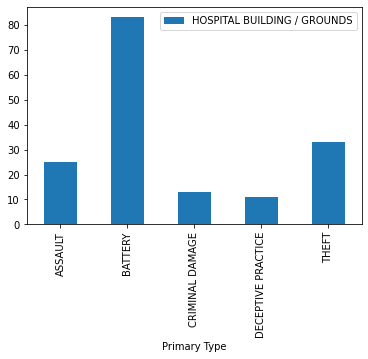

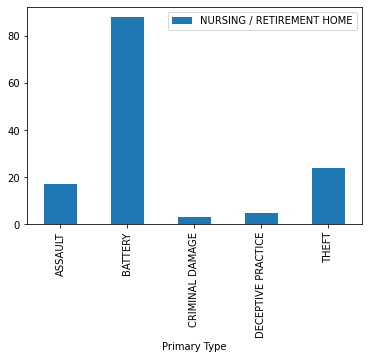

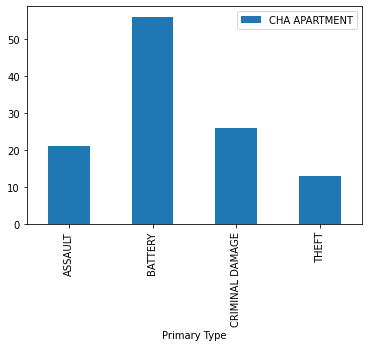

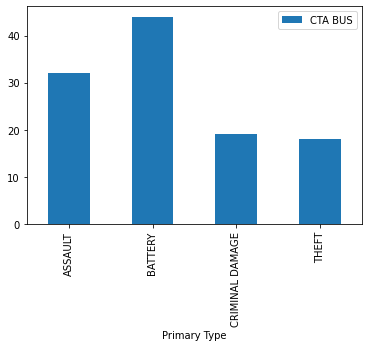

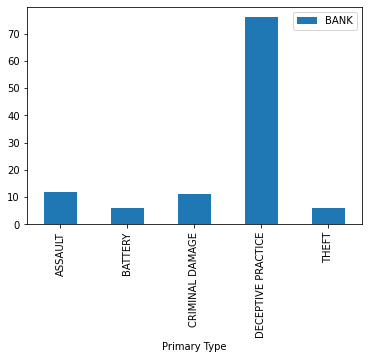

In [7]:
# get the 10 most frequent locations where crime occured
counter = df['Location Description'].value_counts()
counter = counter[counter > 100]
location_top_10 = counter.index.tolist()

# count number of cases for each location and type of crime 
df_1 = df[["Location Description", "Primary Type"]]
grouped_df = df_1.groupby(["Location Description", "Primary Type"]).size().reset_index()
grouped_df = grouped_df.rename(columns={0:"count"})
#grouped_df.sort_values(by=["count"])

for location in location_top_10:
    #print(location)
    grouped_df[grouped_df["Location Description"] == location].plot.bar(x="Primary Type", y='count')
    plt.legend([location])
    plt.show()

In [36]:
df = pd.read_csv("Dataset_crimes.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12260346,JE102126,01/03/2021 01:23:00 PM,070XX S EGGLESTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,6.0,68,08B,1174496.0,1858251.0,2021,01/16/2021 03:49:23 PM,41.766435,-87.635964,"(41.766435144, -87.635963997)"
1,12263464,JE105797,01/03/2021 06:59:00 AM,080XX S YALE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,17.0,44,06,1176011.0,1851718.0,2021,01/16/2021 03:49:23 PM,41.748474,-87.630607,"(41.748473982, -87.630606588)"
2,12259990,JE101773,01/03/2021 12:20:00 AM,056XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,29.0,25,08B,1138722.0,1900183.0,2021,01/16/2021 03:49:23 PM,41.882224,-87.766076,"(41.88222427, -87.766076162)"
3,12260241,JE101923,01/03/2021 08:54:00 AM,106XX S YATES AVE,0560,ASSAULT,SIMPLE,CHA APARTMENT,False,False,...,7.0,51,08A,1194343.0,1834995.0,2021,01/16/2021 03:49:23 PM,41.702154,-87.563980,"(41.702154047, -87.563980453)"
4,12260534,JE102382,01/03/2021 04:30:00 PM,013XX W TAYLOR ST,0820,THEFT,$500 AND UNDER,APARTMENT,True,True,...,28.0,28,06,1167677.0,1895707.0,2021,01/16/2021 03:49:23 PM,41.869367,-87.659882,"(41.869367371, -87.659882148)"


In [9]:
def rename_location(location, lst_locations):
    if not location in lst_locations:
        return "other"
    if "store" in location.lower():
        return "store"
    else:
        return location

In [10]:
# replace nan values 
location_df = df[['Location Description']].replace(np.nan, 'other')
# get lost of location where there were big number of cases
counter = df['Location Description'].value_counts()
counter = counter[counter > 100]
location_others = counter.index.tolist()
# convert all different "store" locations to store
location_df = location_df.applymap(lambda x: rename_location(x, location_others))
location_df["Location Description"].unique()
# replace the old location column
df["Location Description"] = location_df["Location Description"]

# beat feature

In [11]:
df = pd.read_csv("Dataset_crimes.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df.shape

(34225, 22)

In [12]:
# get the 10 most frequent locations where crime occured
counter = df['Beat'].value_counts()
#counter = counter[counter > 100]
beats_list = counter.index.tolist()

# count number of cases for each location and type of crime 
df_1 = df[["Beat", "Primary Type"]]
grouped_df = df_1.groupby(["Beat", "Primary Type"]).size().reset_index()
grouped_df = grouped_df.rename(columns={0:"count"})
important_beats = []
for beat in grouped_df.Beat.unique():
    if grouped_df[grouped_df.Beat==beat].max().to_numpy()[2]/grouped_df[grouped_df.Beat==111].sum().to_numpy()[2] > 0.5:
        important_beats.append(beat)
        print(grouped_df[grouped_df.Beat==beat])
print(important_beats)
#for beat in beats_list:
#    print(beat)
#    grouped_df[grouped_df["Beat"] == beat].plot.bar(x="Primary Type", y='count')
#    plt.legend([beat])
#    plt.show()

   Beat        Primary Type  count
0   111             ASSAULT     10
1   111             BATTERY     29
2   111     CRIMINAL DAMAGE      8
3   111  DECEPTIVE PRACTICE     19
4   111               THEFT     79
    Beat        Primary Type  count
30   123             ASSAULT     12
31   123             BATTERY     44
32   123     CRIMINAL DAMAGE     23
33   123  DECEPTIVE PRACTICE     34
34   123               THEFT    101
     Beat        Primary Type  count
135   312             ASSAULT     25
136   312             BATTERY     80
137   312     CRIMINAL DAMAGE     31
138   312  DECEPTIVE PRACTICE     11
139   312               THEFT     22
     Beat        Primary Type  count
165   324             ASSAULT     29
166   324             BATTERY     88
167   324     CRIMINAL DAMAGE     47
168   324  DECEPTIVE PRACTICE     18
169   324               THEFT     38
     Beat        Primary Type  count
210   421             ASSAULT     73
211   421             BATTERY    141
212   421     CRIMI

In [ ]:
frames = [df_part1, df_part2]
df = pd.concat(frames)
df.to_csv("Dataset_crimes.csv")

In [ ]:
y = df["Primary Type"]
X = df.drop(["Primary Type"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime as dt


def make_categorical(feature, x_df):
    feature_column = pd.get_dummies(x_df[feature], prefix=feature, drop_first=True)
    x_df.drop(feature, axis='columns', inplace=True)
    x_df = pd.concat([x_df, feature_column], axis=1)
    return x_df

def date_pre(df):
    df_date=df["Date"].apply(lambda x:dt.strptime(x,"%m/%d/%Y %I:%M:%S %p"))
    df_update=df["Updated On"].apply(lambda x:dt.strptime(x,"%m/%d/%Y %I:%M:%S %p"))

    df["month"]=df_date.apply(lambda x:x.month)
    #df["Mday"]=df_date.apply(lambda x:x.day)
    df["Wday"]=df_date.apply(lambda x:x.weekday())
    df["hour"]=df_date.apply(lambda x:x.hour)#+x.minute/60)
    df["days from update"]=(df_update-df_date).apply(lambda x:x.days)
    df["Arrest"]*=1
    df.drop("Date", axis = 'columns' ,inplace = True)
    df.drop("Updated On", axis = 'columns' ,inplace = True)
    return df

def dimension_reduction(df, feature):
    counter = df[feature].value_counts()
    feature_list = counter.index.tolist()

    # count number of cases for each location and type of crime 
    df_1 = df[[feature, "Primary Type"]]
    grouped_df = df_1.groupby([feature, "Primary Type"]).size().reset_index()
    grouped_df = grouped_df.rename(columns={0:"count"})
    important_values = []
    for val in grouped_df[feature].unique():
        if grouped_df[grouped_df[feature]==val].max().to_numpy()[2]/grouped_df[grouped_df[feature]==111].sum().to_numpy()[2] > 0.5:
            important_values.append(val)
    return important_values
    
def filter_feature_values(val, lst_values):
    if not val in lst_values:
        return 0
    else:
        return val

def PreProcess_dataset(dataset):
    dataset = date_pre(dataset)
    dataset = pre_location(dataset)
    #dataset = pre_feature(dataset, 'Beat')
    #
    x_df = dataset[list_of_features + list_of_categorical_features]
    for feature in list_of_categorical_features:
        x_df = make_categorical(feature, x_df)
        
    return x_df

def data_processing(path, list_of_features, list_of_categorical_features):
    df = pd.read_csv(path)
    df = df.drop(["Unnamed: 0"], axis=1)
    df = df.dropna()
    # split train & test 
    y = df["Primary Type"]
    X = df.drop(["Primary Type"], axis=1)
    X = PreProcess_dataset(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     
    return X_train, y_train, X_test, y_test

def second_pre(df):
    df_date=df["Date"].apply(lambda x:dt.strptime(x,"%m/%d/%Y %H:%M:%S %p"))
    df["Wday"]=df_date.apply(lambda x:x.weekday())
    df["hour"]=df_date.apply(lambda x:x.hour+(0.5 if x.minute>=30 else 0))
    ndf=df[["Wday","hour","Y Coordinate","X Coordinate"]]
    return ndf

def rename_location(location, lst_locations):
    if not location in lst_locations:
        return "other"
    if "store" in location.lower():
        return "store"
    else:
        return location

def pre_feature(df, feature): 
    important_values = dimension_reduction(df, feature)
    # replace nan values 
    location_df = df[[feature]].replace(np.nan, 'other')
    # get lost of location where there were big number of cases
    counter = df[feature].value_counts()
    location_others = counter.index.tolist()
    # convert all different "store" locations to store
    location_df = location_df.applymap(lambda x: filter_feature_values(x, important_values))
    location_df[feature].unique()
    # replace the old location column
    df[feature] = location_df[feature]
    return df

def pre_location(df):
    # replace nan values 
    location_df = df[['Location Description']].replace(np.nan, 'other')
    # get lost of location where there were big number of cases
    counter = df['Location Description'].value_counts()
    counter = counter[counter > 100]
    location_others = counter.index.tolist()
    # convert all different "store" locations to store
    location_df = location_df.applymap(lambda x: rename_location(x, location_others))
    location_df["Location Description"].unique()
    # replace the old location column
    df["Location Description"] = location_df["Location Description"]
    return df
    

In [ ]:
path = r'dataset_crimes.csv'
list_of_features = ['Arrest', 'Domestic', "days from update"]
list_of_categorical_features = ['Beat', 'Ward', 'Community Area', 'District', 'Location Description', "month", "Wday", "hour" ]
#list_of_categorical_features = ['Location Description']
X_train, y_train, X_test, y_test = data_processing(path, list_of_features,list_of_categorical_features)
print(X_train.shape)
#print(X_train.columns.tolist())
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
for col in X_test.columns:
    print(col)

# PCA

# LogissticRegression

In [ ]:
classifier = LogisticRegression(penalty='l2',C=1.0)
classifier.fit(X_train, y_train)

In [ ]:
print(classifier.score(X_train, y_train))

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_train, y_train,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Decision Tree

In [ ]:
clf = DecisionTreeClassifier(random_state=0, splitter='random', max_depth=10)
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)

In [40]:
depth = range(5,100,5)
accuracy_train = []
accuracy_test = []
for k in depth:
    clf = DecisionTreeClassifier(random_state=0, splitter='best', max_depth=k)
    clf.fit(X_train, y_train)
    accuracy_train.append(clf.score(X_train, y_train))
    accuracy_test.append(clf.score(X_test, y_test))
    #score = cross_val_score(clf, X_train, y_train, cv=10)

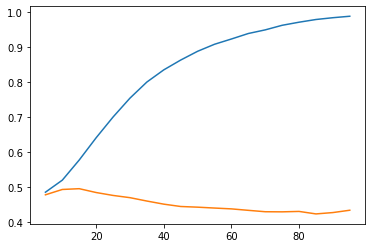

In [41]:
plt.plot(depth, accuracy_train, label='train')
plt.plot(depth, accuracy_test, label='test')

# Random Forest

In [42]:
features_number = [5, 10, 20, 30, 40, 50,60, 70 ,80, 100, 150, 200]
accuracy_train = []
accuracy_test = []
for f in features_number:
    print(f)
    clf = RandomForestClassifier(max_depth=20, random_state=0, max_features=f, n_estimators=50)
    clf.fit(X_train, y_train)
    accuracy_train.append(clf.score(X_train, y_train))
    accuracy_test.append(clf.score(X_test, y_test))

5
10
20
30
40
50
60
70
80
100
150
200


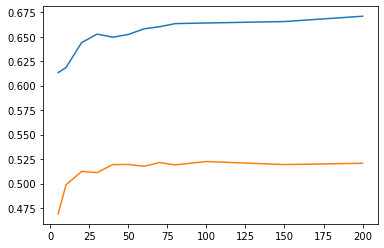

In [43]:
plt.plot(features_number, accuracy_train, label='train')
plt.plot(features_number, accuracy_test, label='test')

In [44]:
accuracy_train = []
accuracy_test = []

clf = RandomForestClassifier(max_depth=20, random_state=0, max_features=200, n_estimators=100)
clf.fit(X_train, y_train)
accuracy_train.append(clf.score(X_train, y_train))
accuracy_test.append(clf.score(X_test, y_test))

In [45]:
print(accuracy_train)
print(accuracy_test)

[0.6740927456722393]
[0.5208302446256486]


Confusion matrix, without normalization
[[ 231 1560  601  445  953]
 [ 180 5597  695  347  918]
 [ 102 1081 1593  663 1217]
 [  28  111  142 3419  511]
 [ 110  766 1061 1160 3486]]
Normalized confusion matrix
[[0.06094987 0.4116095  0.1585752  0.11741425 0.25145119]
 [0.02326483 0.72340701 0.0898281  0.04484942 0.11865064]
 [0.02190722 0.23217354 0.34213918 0.14239691 0.26138316]
 [0.00664925 0.02635953 0.03372121 0.81192116 0.12134885]
 [0.01670971 0.11636032 0.16117272 0.17621145 0.5295458 ]]


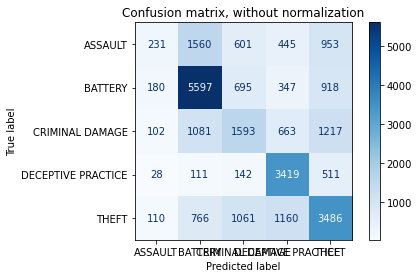

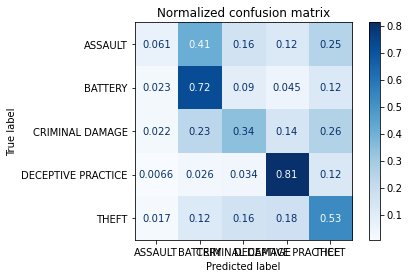

In [46]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_train, y_train,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [63]:
# Neural Network
# Create Model with configuration 
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000,
                         early_stopping= True
                        )

# Model Training
nn_model.fit(X=X_train,
             y=y_train)

# Prediction
result = nn_model.predict(X_test[X_test.columns]) 
result_train = nn_model.predict(X_train[X_train.columns]) 
print("end")

end


In [64]:
# Model Evaluation
ac_sc = accuracy_score(y_test, result)
ac_train = accuracy_score(y_train, result_train)

rc_sc = recall_score(y_test, result, average="weighted")
pr_sc = precision_score(y_test, result, average="weighted")
f1_sc = f1_score(y_test, result, average='micro')
confusion_m = confusion_matrix(y_test, result)

print("========== Neural Network Results ==========")
print("Accuracy on test : ", ac_sc)
print("Accuracy on train   : ", ac_train)

print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Neural Network Results ==========
Accuracy on test :  0.5178650852483321
Accuracy on train   :  0.5468732624087186
Recall      :  0.5178650852483321
Precision   :  0.4796623583052951
F1 Score    :  0.5178650852483321
Confusion Matrix: 
[[  50  412  125   87  277]
 [  55 1371  162   78  245]
 [  31  267  359  153  381]
 [  18   30   42  817  171]
 [  36  192  219  271  896]]
